In [169]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras
import copy
from math import *
import random
from tensorflow.keras.layers import Dense, Flatten


In [170]:
# Functions
def f_1(x):
    return x*sin(6*pi*x)*exp(-1 * x * x)

In [171]:
# Training Data

data_f1_x = np.array([])
data_f1_y = np.array([])

for i in range(200):
    x_f1 = random.uniform(-1, 1)
    y_f1 = f_1(x_f1)
    
    data_f1_x = np.append(data_f1_x, x_f1)
    data_f1_y = np.append(data_f1_y, y_f1)

In [172]:
# Splits

data_points = [10, 40, 80, 200]
hidden_nodes = [2, 10, 40, 100]

M = []

In [173]:
# Implementation

num_points = data_points[3]
num_nodes = hidden_nodes[2]
num_train = int(num_points * 0.8)

x = data_f1_x[:num_train]
y = data_f1_y[:num_train]

x_test = data_f1_x[num_train: num_points]
y_test = data_f1_y[num_train: num_points]

In [314]:
mlp = keras.models.Sequential()
mlp.add(Dense(num_nodes, activation="sigmoid", input_shape=(1,), kernel_initializer=keras.initializers.RandomNormal(mean=0., stddev=30), bias_initializer=keras.initializers.RandomNormal(mean=0., stddev=10)))
mlp.add(Dense(1, activation='linear'))
mlp.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])


callbacks = [
    keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor="val_loss",
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=0.00001,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=50,
        verbose=1,
    )
]

In [321]:
h = mlp.fit(x, y, epochs=1000, batch_size=10, validation_split=0.1, verbose=0, callbacks=callbacks)

Epoch 00272: early stopping


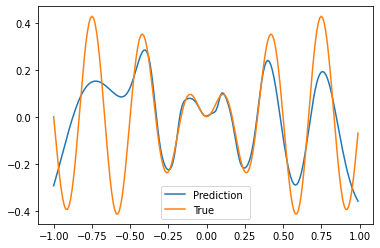

In [322]:
x_range = np.arange(start=-1, stop=1, step=0.01)
y_predict = mlp.predict(x_range)

plt.plot(x_range, y_predict)
plt.plot(x_range, [f_1(x)  for x in x_range])
plt.legend(['Prediction ', 'True'])

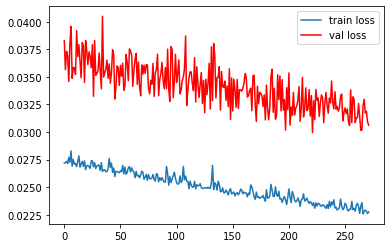

In [323]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'], 'r')
plt.legend(['train loss', 'val loss'])